In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("used_car_prices.csv")
df.head(5)

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,1680204632-1,Skoda Octavia A8 2022,2023-03,"967,000 EGP","926,000 EGP","1,017,000 EGP"
1,1680204632-2,Skoda Octavia A8 2022,2023-02,"979,000 EGP","931,000 EGP","1,045,000 EGP"
2,1680204632-3,Skoda Octavia A8 2022,2023-01,"917,000 EGP","893,000 EGP","950,000 EGP"
3,1680204632-4,Skoda Octavia A8 2022,2022-12,"881,000 EGP","793,000 EGP","950,000 EGP"
4,1680204632-5,Skoda Octavia A8 2022,2022-11,"868,000 EGP","789,000 EGP","950,000 EGP"


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79090 entries, 0 to 79089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  79090 non-null  object
 1   Car Model          79090 non-null  object
 2   Month/Year         78612 non-null  object
 3   Average price      78612 non-null  object
 4   Minimum price      78612 non-null  object
 5   Maximum price      78612 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [204]:
df.isnull().sum()

web-scraper-order      0
Car Model              0
Month/Year           478
Average price        478
Minimum price        478
Maximum price        478
dtype: int64

In [205]:
df["Month/Year"] = pd.to_datetime(df["Month/Year"])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79090 entries, 0 to 79089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   web-scraper-order  79090 non-null  object        
 1   Car Model          79090 non-null  object        
 2   Month/Year         78612 non-null  datetime64[ns]
 3   Average price      78612 non-null  object        
 4   Minimum price      78612 non-null  object        
 5   Maximum price      78612 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.6+ MB


In [207]:
def clean_price(price):
    if isinstance(price, str):
        return float(price.replace(",", "").replace(" EGP", ""))
    return price

In [208]:
df["Average price"] = df["Average price"].apply(clean_price).astype(float)
df["Minimum price"] = df["Minimum price"].apply(clean_price).astype(float)
df["Maximum price"] = df["Maximum price"].apply(clean_price).astype(float)

In [209]:
df

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,1680204632-1,Skoda Octavia A8 2022,2023-03-01,967000.0,926000.0,1017000.0
1,1680204632-2,Skoda Octavia A8 2022,2023-02-01,979000.0,931000.0,1045000.0
2,1680204632-3,Skoda Octavia A8 2022,2023-01-01,917000.0,893000.0,950000.0
3,1680204632-4,Skoda Octavia A8 2022,2022-12-01,881000.0,793000.0,950000.0
4,1680204632-5,Skoda Octavia A8 2022,2022-11-01,868000.0,789000.0,950000.0
...,...,...,...,...,...,...
79085,1680204632-79086,Lada 2107 1991,2018-08-01,30000.0,26000.0,33000.0
79086,1680204632-79087,Lada 2107 1991,2018-07-01,33000.0,32000.0,35000.0
79087,1680204632-79088,Lada 2107 1991,2018-01-01,28000.0,25000.0,30000.0
79088,1680204632-79089,Lada 2107 1991,2017-12-01,27000.0,25000.0,28000.0


In [210]:
df.drop(columns = ["web-scraper-order"], inplace = True)

In [211]:
df.head(2)

,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,Skoda Octavia A8 2022,2023-03-01,967000.0,926000.0,1017000.0
1,Skoda Octavia A8 2022,2023-02-01,979000.0,931000.0,1045000.0


In [212]:
df.dropna(inplace = True)

In [213]:
df.isnull().sum()

Car Model        0
Month/Year       0
Average price    0
Minimum price    0
Maximum price    0
dtype: int64

### Encoding portion begin

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78612 entries, 0 to 79089
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car Model      78612 non-null  object        
 1   Month/Year     78612 non-null  datetime64[ns]
 2   Average price  78612 non-null  float64       
 3   Minimum price  78612 non-null  float64       
 4   Maximum price  78612 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.6+ MB


In [215]:
# Extract the year and create a new "Model Year" column
df["Model Year"] = df["Car Model"].str.extract(r'(\d{4})')

# Remove the year from the "Car Model" column
df["Car Model"] = df["Car Model"].str.replace(r'\s*\d{4}$', '', regex=True)

In [216]:
df["Model Year"] = df["Model Year"].astype(int)
# Convert "Model Year" to datetime, forcing only the year part
df["Model Year"] = pd.to_datetime(df["Model Year"], format='%Y', errors='coerce')

# Handle potential NaT values
df["Model Year"] = df["Model Year"].dt.year

In [217]:
orginal_df = pd.DataFrame(df)
orginal_df

,Car Model,Month/Year,Average price,Minimum price,Maximum price,Model Year
0,Skoda Octavia A8,2023-03-01,967000.0,926000.0,1017000.0,2022.0
1,Skoda Octavia A8,2023-02-01,979000.0,931000.0,1045000.0,2022.0
2,Skoda Octavia A8,2023-01-01,917000.0,893000.0,950000.0,2022.0
3,Skoda Octavia A8,2022-12-01,881000.0,793000.0,950000.0,2022.0
4,Skoda Octavia A8,2022-11-01,868000.0,789000.0,950000.0,2022.0
...,...,...,...,...,...,...
79085,Lada 2107,2018-08-01,30000.0,26000.0,33000.0,2107.0
79086,Lada 2107,2018-07-01,33000.0,32000.0,35000.0,2107.0
79087,Lada 2107,2018-01-01,28000.0,25000.0,30000.0,2107.0
79088,Lada 2107,2017-12-01,27000.0,25000.0,28000.0,2107.0


## Encoding part

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
Car_Model_En = LabelEncoder()
df["Car Model"] = Car_Model_En.fit_transform(df["Car Model"])

In [220]:
df

,Car Model,Month/Year,Average price,Minimum price,Maximum price,Model Year
0,339,2023-03-01,967000.0,926000.0,1017000.0,2022.0
1,339,2023-02-01,979000.0,931000.0,1045000.0,2022.0
2,339,2023-01-01,917000.0,893000.0,950000.0,2022.0
3,339,2022-12-01,881000.0,793000.0,950000.0,2022.0
4,339,2022-11-01,868000.0,789000.0,950000.0,2022.0
...,...,...,...,...,...,...
79085,206,2018-08-01,30000.0,26000.0,33000.0,2107.0
79086,206,2018-07-01,33000.0,32000.0,35000.0,2107.0
79087,206,2018-01-01,28000.0,25000.0,30000.0,2107.0
79088,206,2017-12-01,27000.0,25000.0,28000.0,2107.0


In [221]:
df["Month/Year"] = df["Month/Year"].dt.strftime('%Y%m').astype(int)

In [222]:
df1 = df

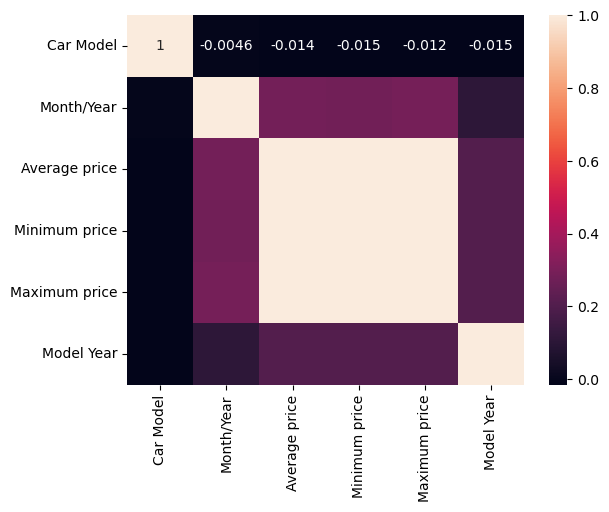

In [223]:
sns.heatmap(data=df1.corr(), annot = True)
plt.show()

In [224]:
#Splite dataset into target and input
input_data = df1.iloc[:,:-2]
output_data = df1["Maximum price"]
input_data

,Car Model,Month/Year,Average price,Minimum price
0,339,202303,967000.0,926000.0
1,339,202302,979000.0,931000.0
2,339,202301,917000.0,893000.0
3,339,202212,881000.0,793000.0
4,339,202211,868000.0,789000.0
...,...,...,...,...
79085,206,201808,30000.0,26000.0
79086,206,201807,33000.0,32000.0
79087,206,201801,28000.0,25000.0
79088,206,201712,27000.0,25000.0


In [225]:
#Now we have to balance the data through scaler
from sklearn.preprocessing import StandardScaler

In [226]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

In [227]:
#Train and test part
from sklearn.model_selection import train_test_split

In [228]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

## Model train part

In [229]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [230]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(99.86879955875122, 99.8842713491479)

In [231]:
#error find
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [232]:
lr1 = Ridge(alpha=1)
lr1.fit(x_train, y_train)
lr1.score(x_train, y_train)*100, lr1.score(x_test, y_test)*100

(99.86875972163813, 99.8840423523701)

In [233]:
#Error
mean_squared_error(y_test, lr1.predict(x_test)), mean_absolute_error(y_test, lr1.predict(x_test))

(46566038.21538382, 3361.36868526881)

In [234]:
lr2 = ElasticNet(alpha=1)
lr2.fit(x_train, y_train)
lr2.score(x_train, y_train)*100, lr2.score(x_test, y_test)*100

(95.5091272723279, 95.61802878543979)

In [235]:
#Error
mean_squared_error(y_test, lr2.predict(x_test)), mean_absolute_error(y_test, lr2.predict(x_test))

(1759703160.6503055, 24277.810450466844)

In [236]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(99.99987336049851, 99.73929020629433)

In [237]:
#Error
mean_squared_error(y_test, dt.predict(x_test)), mean_absolute_error(y_test, dt.predict(x_test))

(104695313.02989252, 4227.074837287201)

In [238]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(99.97805709763551, 99.86643046098)

In [239]:
#Error
mean_squared_error(y_test, rf.predict(x_test)), mean_absolute_error(y_test, rf.predict(x_test))

(53638586.03157684, 3394.890166049332)

In [240]:
knn =  KNeighborsRegressor(n_neighbors = 10)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

(99.72323319728908, 99.72381570603171)

In [241]:
#Error
mean_squared_error(y_test, knn.predict(x_test)), mean_absolute_error(y_test, knn.predict(x_test))

(110909531.62884691, 5027.613572473447)

In [242]:
#Predict the values
rf.predict([[-0.068846, 1.117775, -0.106512, -0.098412]])

C:\Users\pawan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([166380.])

In [243]:
x_test

,Car Model,Month/Year,Average price,Minimum price
44176,-0.068846,1.117775,-0.106512,-0.098412
64777,0.688480,-0.858283,-0.549859,-0.548980
32126,0.886827,0.713851,0.630618,0.656288
54222,-1.078613,0.701971,-0.544517,-0.548980
56180,0.670448,-1.670090,-0.699421,-0.695415
...,...,...,...,...
49721,0.021312,1.094015,-0.368247,-0.385649
68761,1.409742,-1.289927,-0.774203,-0.768632
3601,-0.204082,-0.486040,1.576068,1.585584
15613,1.644153,0.713851,-0.063780,-0.064620


In [244]:
y_test

44486    166000.0
65205     79000.0
32322    304000.0
54606     84000.0
56572     52000.0
           ...   
50081    119000.0
69213     37000.0
3665     500000.0
15723    178000.0
2365     456000.0
Name: Maximum price, Length: 15723, dtype: float64

In [245]:
subset_df = orginal_df.iloc[:15723, :]
subset_df

,Car Model,Month/Year,Average price,Minimum price,Maximum price,Model Year
0,Skoda Octavia A8,2023-03-01,967000.0,926000.0,1017000.0,2022.0
1,Skoda Octavia A8,2023-02-01,979000.0,931000.0,1045000.0,2022.0
2,Skoda Octavia A8,2023-01-01,917000.0,893000.0,950000.0,2022.0
3,Skoda Octavia A8,2022-12-01,881000.0,793000.0,950000.0,2022.0
4,Skoda Octavia A8,2022-11-01,868000.0,789000.0,950000.0,2022.0
...,...,...,...,...,...,...
15828,Renault Sandero Step Way,2018-12-01,219000.0,209000.0,223000.0,2017.0
15829,Renault Sandero Step Way,2018-11-01,215000.0,209000.0,221000.0,2017.0
15830,Renault Sandero Step Way,2018-10-01,223000.0,209000.0,233000.0,2017.0
15831,Renault Sandero Step Way,2018-09-01,221000.0,209000.0,229000.0,2017.0


In [246]:
subset_df["Prediction Price"] = rf.predict(x_test)
subset_df

,Car Model,Month/Year,Average price,Minimum price,Maximum price,Model Year,Prediction Price
0,Skoda Octavia A8,2023-03-01,967000.0,926000.0,1017000.0,2022.0,166250.0
1,Skoda Octavia A8,2023-02-01,979000.0,931000.0,1045000.0,2022.0,81882.5
2,Skoda Octavia A8,2023-01-01,917000.0,893000.0,950000.0,2022.0,307020.0
3,Skoda Octavia A8,2022-12-01,881000.0,793000.0,950000.0,2022.0,83780.0
4,Skoda Octavia A8,2022-11-01,868000.0,789000.0,950000.0,2022.0,50723.0
...,...,...,...,...,...,...,...
15828,Renault Sandero Step Way,2018-12-01,219000.0,209000.0,223000.0,2017.0,118380.0
15829,Renault Sandero Step Way,2018-11-01,215000.0,209000.0,221000.0,2017.0,35740.0
15830,Renault Sandero Step Way,2018-10-01,223000.0,209000.0,233000.0,2017.0,501350.0
15831,Renault Sandero Step Way,2018-09-01,221000.0,209000.0,229000.0,2017.0,176440.0


In [247]:
pd.options.mode.copy_on_write = True
subset_df["Prediction Price"] = subset_df["Prediction Price"].apply(lambda x: f"{x:.1f}")

In [250]:
subset_df["Prediction Price"].isnull().sum()

0

In [248]:
subset_df.to_csv("car_prices_prediction.csv", index = False)